### Programming Session Week 3

In this session we will continue to work on regression and we will extend our toolbox to include an additional set of classification methods. 

### Exercise 1

#### Exercise 1.a

The model below was generated using a degree 2 polynomial. Study the evolution of the MSE for various degrees from 1 to 5 and by generating your training and test sets as noisy samples from the true quadratic function. Use $K$-fold cross validation to retrieve the correct model complexity out the possible maximum degrees.

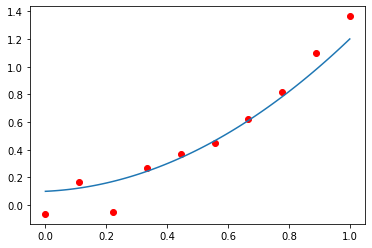

In [15]:
import numpy as np


x_true = np.linspace(0,1,100)
x_sample = np.linspace(0,1,10)
t_true = 0.1 + 0.1*x_true + x_true**2
t_sample = 0.1 + 0.1*x_sample + x_sample**2
t_sample = t_sample + np.random.normal(0,.1,len(x_sample))

plt.plot(x_true, t_true)
plt.scatter(x_sample, t_sample, c='r')
plt.show()


### Exercise 2

#### Exercise 2.a

Using the OLS loss, try to learn a classifier for the dataset given below. 

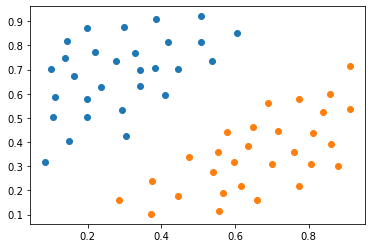

In [1]:

import scipy.io
import matplotlib.pyplot as plt

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex1.mat')['points_class1_Lab2_Ex1']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex1.mat')['points_class2_Lab2_Ex1']

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.show()

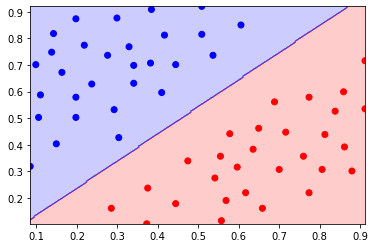

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

data = np.vstack((data_class1, data_class2))

t_class1 = np.ones((np.shape(data_class1)[0], 1))
t_class2 = 0*np.ones((np.shape(data_class2)[0], 1))

t_class = np.vstack((t_class1, t_class2))


MyRegression = LinearRegression()

# learning the linear classifier 
MyRegression.fit(data, t_class)

# apply the classifier 

# limits of the space
x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])


x1 = np.linspace(x1min, x1max, 200)
x2 = np.linspace(x2min, x2max, 200)

# generating all pairs of (x1_i, x2_j) on the x1 * x2 grid 
xx1, xx2 = np.meshgrid(x1, x2)

# feature matrix for the grid
Xgrid = np.vstack((xx1.flatten(), xx2.flatten())).T

# on the grid we can compute the classification

# getting the weights from the trained model
beta = np.zeros((3,))
beta[1:] = MyRegression.coef_
beta[0] = MyRegression.intercept_

Xgrid_tilde = np.hstack((np.ones((np.shape(Xgrid)[0],1)), Xgrid))

prediction_grid = np.matmul(Xgrid_tilde, beta)

grid_class = prediction_grid>1/2


from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

plt.contourf(xx1,xx2, grid_class.reshape(np.shape(xx1)), \
            alpha=.2, cmap =cm_bright )
plt.scatter(data[:,0], data[:,1], c=t_class, cmap =cm_bright)
plt.show()

#### Exercise 2.b

How could you extend your classifier to the dataset shown below.

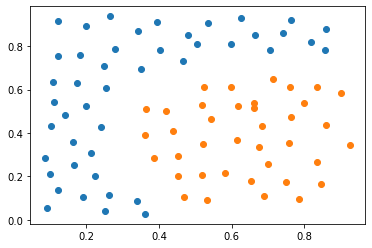

In [21]:

import scipy.io
import matplotlib.pyplot as plt

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex2.mat')['points_class1_Lab2_Ex2']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex2.mat')['points_class2_Lab2_Ex2']

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.show()

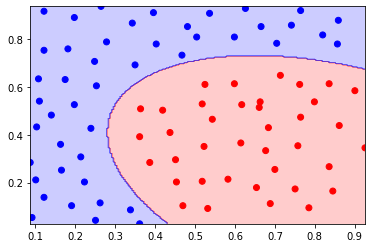

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


data = np.vstack((data_class1, data_class2))

targets_class1 = np.ones((np.shape(data_class1)[0],1))
targets_class2 = np.zeros((np.shape(data_class2)[0],1))

target = np.vstack((targets_class1, targets_class2))

myPolynomialFeatures = PolynomialFeatures(2)


Xtilde = myPolynomialFeatures.fit_transform(data)

MyLinearModel = LinearRegression()
MyLinearModel.fit(Xtilde, target)


# limits of the space
x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

x1 = np.linspace(x1min, x1max, 200)
x2 = np.linspace(x2min, x2max, 200)

# generating all pairs of (x1_i, x2_j) on the x1 * x2 grid 
xx1, xx2 = np.meshgrid(x1, x2)

# feature matrix for the grid
Xgrid = np.vstack((xx1.flatten(), xx2.flatten())).T

Xgrid_tilde = myPolynomialFeatures.fit_transform(Xgrid)


prediction_grid = MyLinearModel.predict(Xgrid_tilde)

grid_class = prediction_grid>1/2

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

plt.contourf(xx1,xx2, grid_class.reshape(np.shape(xx1)), \
            alpha=.2, cmap =cm_bright )
plt.scatter(data[:,0], data[:,1], c=target, cmap =cm_bright)
plt.show()

#### Exercise 2.c

We now want to use the OLS to learn a multi-class classifier for the dataset below. Start by coding the one-vs-one and one-vs-rest classifiers. Then use the a single 
 discriminant function with one hot encoding of the classes.
    

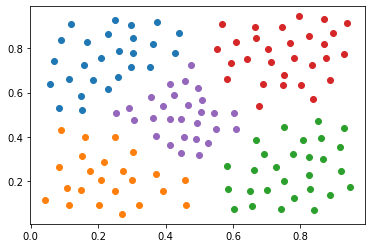

In [115]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex3.mat')['points_class1_Lab2_Ex3']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex3.mat')['points_class2_Lab2_Ex3']
data_class3 = scipy.io.loadmat('points_class3_Lab2_Ex3.mat')['points_class3_Lab2_Ex3']
data_class4 = scipy.io.loadmat('points_class4_Lab2_Ex3.mat')['points_class4_Lab2_Ex3']
data_class5 = scipy.io.loadmat('points_class5_Lab2_Ex3.mat')['points_class5_Lab2_Ex3']

data_12 = np.vstack((data_class1, data_class2))
data_123 = np.vstack((data_12, data_class3))
data_1234 = np.vstack((data_123, data_class4))
data = np.vstack((data_1234, data_class5))


target1 = np.ones((np.shape(data_class1)[0], 1))
target2 = 2*np.ones((np.shape(data_class2)[0], 1))
target3 = 3*np.ones((np.shape(data_class3)[0], 1))
target4 = 4*np.ones((np.shape(data_class4)[0], 1))
target5 = 5*np.ones((np.shape(data_class5)[0], 1))


target_12 = np.vstack((target1, target2))
target_123 = np.vstack((target_12, target3))
target_1234 = np.vstack((target_123, target4))
target = np.vstack((target_1234, target5))

N = np.shape(data)[0]

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.scatter(data_class3[:,0], data_class3[:,1])
plt.scatter(data_class4[:,0], data_class4[:,1])
plt.scatter(data_class5[:,0], data_class5[:,1])
plt.show()

In [116]:
np.shape(data)[0]

134

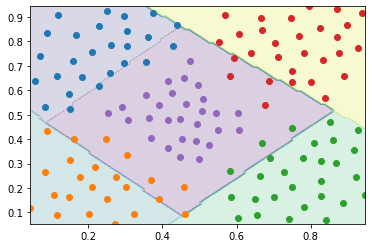

In [117]:
K = 5

x1min = min(data[:,0])
x1max = max(data[:,0])
x2min = min(data[:,1])
x2max = max(data[:,1])

x1 = np.linspace(x1min, x1max, 100)
x2 = np.linspace(x2min, x2max, 100)

xx1, xx2 = np.meshgrid(x1, x2)

data_prediction = np.vstack((xx1.flatten(), xx2.flatten())).T

# number of points on the grid
Nprediction = np.shape(data_prediction)[0]


from sklearn.linear_model import LinearRegression


final_prediction = np.zeros((Nprediction,1))

# one vs rest 
for i in [1,2,3,4]:
    
    target_tmp = np.zeros((N,))
    ind = np.squeeze(np.argwhere(target == i))
    target_tmp[ind] = 1
    MyRegression = LinearRegression()
    MyRegression.fit(data,target_tmp)
    
    prediction = MyRegression.predict(data_prediction)
    
    ind = np.argwhere(prediction>1/2)
    
    final_prediction[ind]=i
    
plt.contourf(xx1, xx2, final_prediction.reshape(np.shape(xx1)), alpha=.2)
plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.scatter(data_class3[:,0], data_class3[:,1])
plt.scatter(data_class4[:,0], data_class4[:,1])
plt.scatter(data_class5[:,0], data_class5[:,1])
plt.show()




In [118]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


MyPolynomialFeatures = PolynomialFeatures(10)

K = 5

x1min = min(data[:,0])
x1max = max(data[:,0])
x2min = min(data[:,1])
x2max = max(data[:,1])

x1 = np.linspace(x1min, x1max, 100)
x2 = np.linspace(x2min, x2max, 100)

xx1, xx2 = np.meshgrid(x1, x2)

data_prediction = np.vstack((xx1.flatten(), xx2.flatten())).T


data_predictionFeatures = \
MyPolynomialFeatures.fit_transform(data_prediction)


# number of points on the grid
Nprediction = np.shape(data_prediction)[0]



votes = np.zeros((Nprediction ,K))

counter = 0

data_features = MyPolynomialFeatures.fit_transform(data)


for i in np.arange(K):
    for j in np.arange(i):
        
        
        indices_i = np.squeeze(np.argwhere(np.squeeze(target) == i+1))
        indices_j = np.squeeze(np.argwhere(np.squeeze(target) == j+1))
        
        data_i = data_features[indices_i, :]
        data_j = data_features[indices_j, :]
        
        data_ij = np.vstack((data_i, data_j))
        
        # number of points in class i
        Ni = np.shape(data_i)[0]
        Nj = np.shape(data_j)[0]
        
        target_ij = np.zeros((Ni + Nj,))
        target_ij[:Ni] = 1
        
        MyRegression = Ridge(alpha=.001)
        MyRegression.fit(data_ij,target_ij)
        
        prediction_ij = MyRegression.predict(data_predictionFeatures)        
        
        ind_i = np.squeeze(
            np.argwhere(np.squeeze(prediction_ij)>1/2))
        ind_j= np.squeeze(
            np.argwhere(np.squeeze(prediction_ij)<1/2))
        
        votes[ind_i, i] = votes[ind_i, i]+1
        votes[ind_j, j] = votes[ind_j, j]+1

        counter = counter+1

In [119]:
classification_oneVSone = np.argmax(votes, axis=1)


In [61]:
np.arange(1,K+1)

array([1, 2, 3, 4, 5])

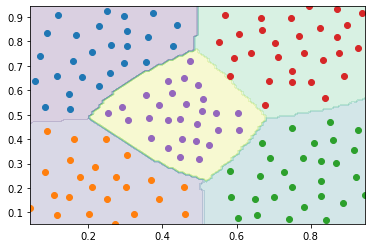

In [120]:
plt.contourf(xx1, xx2, classification_oneVSone.reshape(np.shape(xx1)), alpha=.2)
plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.scatter(data_class3[:,0], data_class3[:,1])
plt.scatter(data_class4[:,0], data_class4[:,1])
plt.scatter(data_class5[:,0], data_class5[:,1])
plt.show()

In [122]:
# one hot encoding targets
target = np.squeeze(target)
T = np.zeros((N, K))

for i in np.arange(N):
    
    tmp = np.zeros((K,))
    tmp[int(target[i]-1)]=1
    T[i,:] = tmp

In [135]:
# K discriminant (with degree 4 features)

MyPolynomialFeatures = PolynomialFeatures(4)

dataPoly = MyPolynomialFeatures.fit_transform(data)

X = dataPoly
tmp_inv = np.linalg.inv(np.matmul(X.T,X))

RHS = np.matmul(X.T,T)
beta = np.matmul(tmp_inv, RHS)

data_predictionFeatures = \
MyPolynomialFeatures.fit_transform(data_prediction)


In [139]:
prediction = np.zeros((Nprediction, K))
for k in np.arange(K):

    prediction[:,k] = np.squeeze(
        np.matmul(data_predictionFeatures, beta[:,k].reshape(-1,1)))


final_classification = np.argmax(prediction, axis=1)


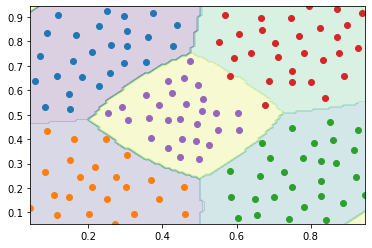

In [140]:

plt.contourf(xx1, xx2, final_classification.reshape(np.shape(xx1)), alpha=.2)
plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.scatter(data_class3[:,0], data_class3[:,1])
plt.scatter(data_class4[:,0], data_class4[:,1])
plt.scatter(data_class5[:,0], data_class5[:,1])
plt.show()


### Exercise 3. 

#### Exercise 3.a 

Use the OLS classifier from scikit-learn to classify the flowers from the [iris dataset](https://www.kaggle.com/uciml/iris) into the 3 species. Don't forget to split your dataset into a training and a test part so that you evaluate it properly once it has been trained (you can rely on scikit learn's train_test_split function)
    

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



#### Exercise 3.a 
Do the same with the [https://www.kaggle.com/c/titanic](titanic dataset) and try to learn a model that can efficiently predict which passengers are going to survive the wreck. 

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



### Exercise 4. 

#### Exercise 4.a 

In this 4th exercise, we will study the robustness of the OLS approach for classification. Consider the dataset below. 

- Start by learning a simple binary OLS classifier on that dataset (you can use the linear_regression model from scikit-learn). 
- Then try to force misclassification by adding a blue point on the far left of the dataset. 
- Once your updated dataset can be used to highlight misclassification by the OLS, replace the OLS classifier with the logistic regression classifier from scikit learn (on the same dataset). What do you notice ?


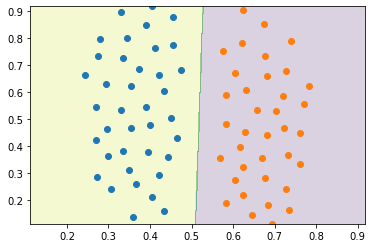

In [148]:

import scipy.io
import matplotlib.pyplot as plt

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex4.mat')['points_class1_Lab2_Ex4']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex4.mat')['points_class2_Lab2_Ex4']

# defining number of elements in class1 and class2
N1 = np.shape(data_class1)[0]
N2 = np.shape(data_class2)[0]

# complete training set 
data = np.vstack((data_class1, data_class2))
# number of points in the training set 
N = N1+N2
# defining the target vector
target = np.zeros((N,))
target[:N1] = 1

# training the linear model from scikit
from sklearn.linear_model import LinearRegression

MyLinearModel = LinearRegression()
MyLinearModel.fit(data, target)

# generating the validation set (in this case the grid)
x1min = np.min(data) 
x1max = np.max(data)
x2min = np.min(data)
x2max = np.max(data)

x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

# xx1, xx2 are stored as matrices 
# --> should be reshaped as the columns of a feature matrix

Xgrid = np.vstack((xx1.flatten(), xx2.flatten())).T


# getting prediction from the linear model 
# through the 'predict' function 

prediction = MyLinearModel.predict(Xgrid)>1/2

# we need to reshape prediction so that is squared 
# (size of the grid)
plt.contourf(xx1,xx2,prediction.reshape(np.shape(xx1)), alpha=.2)

plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.show()




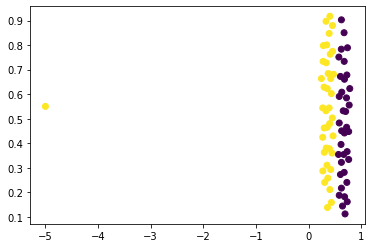

In [164]:
outlier = np.asarray([-5,0.55])
target_outlier = 1

data_with_outlier = np.vstack((outlier, data))
target_with_outlier = np.vstack((target_outlier, target.reshape(-1,1)))


plt.scatter(data_with_outlier[:,0], 
            data_with_outlier[:,1], c=target_with_outlier)
plt.show()



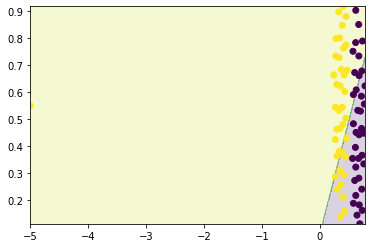

In [165]:
MyLinearModel = LinearRegression()
MyLinearModel.fit(data_with_outlier, target_with_outlier)


x1min = np.min(data_with_outlier[:,0]) 
x1max = np.max(data_with_outlier[:,0])
x2min = np.min(data_with_outlier[:,1])
x2max = np.max(data_with_outlier[:,1])

x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

# xx1, xx2 are stored as matrices 
# --> should be reshaped as the columns of a feature matrix

Xgrid = np.vstack((xx1.flatten(), xx2.flatten())).T


# getting prediction from the linear model 
# through the 'predict' function 

prediction = MyLinearModel.predict(Xgrid)>1/2

# we need to reshape prediction so that is squared 
# (size of the grid)
plt.contourf(xx1,xx2,prediction.reshape(np.shape(xx1)), alpha=.2)

plt.scatter(data_with_outlier[:,0], 
            data_with_outlier[:,1], c=target_with_outlier)
plt.show()



/Users/augustincosse/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


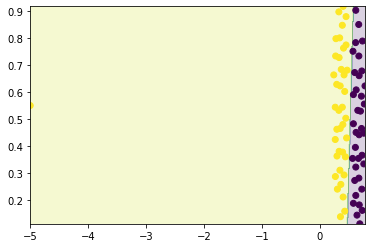

In [166]:
from sklearn.linear_model import LogisticRegression


MyLogisticModel = LogisticRegression()
MyLogisticModel.fit(data_with_outlier, target_with_outlier)


x1min = np.min(data_with_outlier[:,0]) 
x1max = np.max(data_with_outlier[:,0])
x2min = np.min(data_with_outlier[:,1])
x2max = np.max(data_with_outlier[:,1])

x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

# xx1, xx2 are stored as matrices 
# --> should be reshaped as the columns of a feature matrix

Xgrid = np.vstack((xx1.flatten(), xx2.flatten())).T


# getting prediction from the linear model 
# through the 'predict' function 

prediction = MyLogisticModel.predict(Xgrid)>1/2

# we need to reshape prediction so that is squared 
# (size of the grid)
plt.contourf(xx1,xx2,prediction.reshape(np.shape(xx1)), alpha=.2)

plt.scatter(data_with_outlier[:,0], 
            data_with_outlier[:,1], c=target_with_outlier)
plt.show()
